<a href="https://colab.research.google.com/github/kodi73/Simple-Neural-Network-for-AND-Problem/blob/main/Simple_Neural_Network_for_AND_problem_Minimizing_error_using_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt

Input array and the expected output.

In [10]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
d = np.array([0, 0, 0, 1])

In [11]:
def initialize_network_parameters():
  inputSize = 2
  hiddenSize = 2
  outputSize = 1

  lr = 0.1
  epochs = 180000

  w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1
  w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1
  b1 = np.random.rand(hiddenSize, 1) * 2 - 1
  b2 = np.random.rand(outputSize, 1) * 2 - 1

  return w1, w2, b1, b2, lr, epochs

Training the Neural Network

In [12]:
w1, w2, b1, b2, lr, epochs = initialize_network_parameters()

error_list = []

for epoch in range(epochs):
  z1 = np.dot(w1, X) + b1
  a1 = 1.0 / (1.0 + np.exp(-z1))

  z2 = np.dot(w2, a1) + b2
  a2 = 1.0 / (1.0 + np.exp(-z2))

  error = d - a2

  da2 = error * (a2 * (1 - a2))
  dz2 = da2

  da1 = np.dot(w2.T, dz2)
  dz1 = da1 * (a1 * (1 - a1))

  w2 += lr * np.dot(dz2, a1.T)
  b2 += lr * np.sum(dz2, axis=1, keepdims=True)

  w1 += lr * np.dot(dz1, X.T)
  b1 += lr * np.sum(dz1, axis=1, keepdims=True)

  if (epoch + 1) % 10000 == 0:
    print(f"Epoch {epoch}, Error: {np.mean(np.abs(error))}")
    error_list.append(np.mean(np.abs(error)))

Epoch 9999, Error: 0.02433611286018481
Epoch 19999, Error: 0.015115197601064792
Epoch 29999, Error: 0.01168977163773606
Epoch 39999, Error: 0.009810121625057715
Epoch 49999, Error: 0.00859087055710828
Epoch 59999, Error: 0.007721948710902355
Epoch 69999, Error: 0.007064074665264442
Epoch 79999, Error: 0.0065445195697140975
Epoch 89999, Error: 0.006121232925523546
Epoch 99999, Error: 0.005768037877956447
Epoch 109999, Error: 0.005467698115221879
Epoch 119999, Error: 0.005208351845799569
Epoch 129999, Error: 0.0049815394784480695
Epoch 139999, Error: 0.004781047589219207
Epoch 149999, Error: 0.00460219837644543
Epoch 159999, Error: 0.004441395272025155
Epoch 169999, Error: 0.0042958224330338956
Epoch 179999, Error: 0.004163240182199762


Testing the Neural Network

In [13]:
z1 = np.dot(w1, X) + b1
a1 = 1.0 / (1.0 + np.exp(-z1))

z2 = np.dot(w2, a1) + b2
a2 = 1.0 / (1.0 + np.exp(-z2))

print(f"Final Output After Training: {a2}")
print(f"Ground truth: {d}")
print(f"Error: {error}")
print(f"Average Error: {np.mean(np.abs(error))}")

Final Output After Training: [[2.76880437e-04 4.65690303e-03 5.00564052e-03 9.93286514e-01]]
Ground truth: [0 0 0 1]
Error: [[-0.00027688 -0.00465692 -0.00500566  0.00671351]]
Average Error: 0.004163240182199762


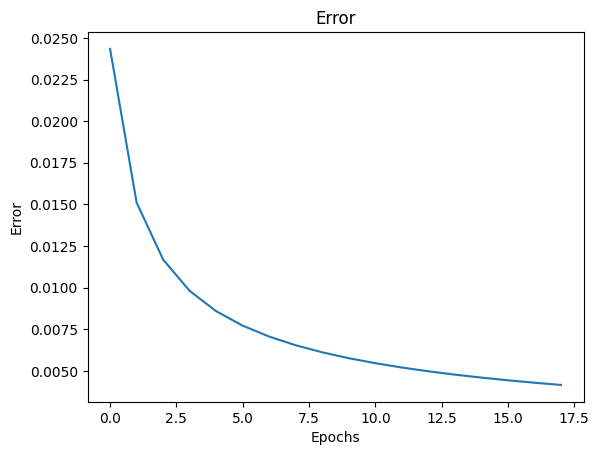

In [14]:
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()